In [2]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
data = pd.read_csv("waste_sensor_data.csv")

In [3]:
data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17


In [4]:
# Display the first few rows of the DataFrame
print(data.head())

   sensor_id            timestamp      waste_type  inductive_property  \
0          3  2023-09-01 12:00:00  non_recyclable                0.90   
1          4  2023-09-01 12:15:00      recyclable                1.18   
2          3  2023-09-01 12:30:00  non_recyclable                0.87   
3          2  2023-09-01 12:45:00         organic                1.00   
4          3  2023-09-01 13:00:00      recyclable                1.39   

   capacitive_property  moisture_property  infrared_property  
0                 0.12               0.47              16.27  
1                 0.66               0.33              36.00  
2                 0.14               0.83              58.89  
3                 0.37               0.52              91.80  
4                 0.88               0.76              98.83  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sensor_id            20000 non-null  int64  
 1   timestamp            20000 non-null  object 
 2   waste_type           20000 non-null  object 
 3   inductive_property   20000 non-null  float64
 4   capacitive_property  20000 non-null  float64
 5   moisture_property    20000 non-null  float64
 6   infrared_property    20000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,sensor_id,inductive_property,capacitive_property,moisture_property,infrared_property
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.495900,1.003058,0.501873,0.501766,50.180508
std,1.115188,0.230327,0.288173,0.288086,28.836594
min,1.000000,0.600000,0.000000,0.000000,0.010000
25%,2.000000,0.810000,0.250000,0.250000,25.337500
50%,2.000000,1.000000,0.510000,0.500000,50.090000
75%,3.000000,1.200000,0.750000,0.750000,74.972500
max,4.000000,1.400000,1.000000,1.000000,100.000000


In [ ]:
# Check data types of each column
print(data.dtypes)

sensor_id                int64
timestamp               object
waste_type              object
inductive_property     float64
capacitive_property    float64
moisture_property      float64
infrared_property      float64
dtype: object


In [ ]:
data['waste_type'].unique()

array(['non_recyclable', 'recyclable', 'organic'], dtype=object)

In [ ]:
data['waste_type'].value_counts()


,count
waste_type,
non_recyclable,6729
organic,6653
recyclable,6618


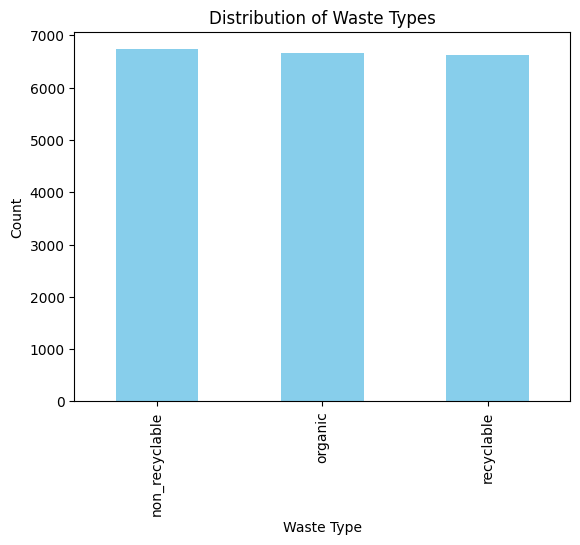

In [ ]:
import matplotlib.pyplot as plt

data['waste_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Waste Types')
plt.xlabel('Waste Type')
plt.ylabel('Count')
plt.show()


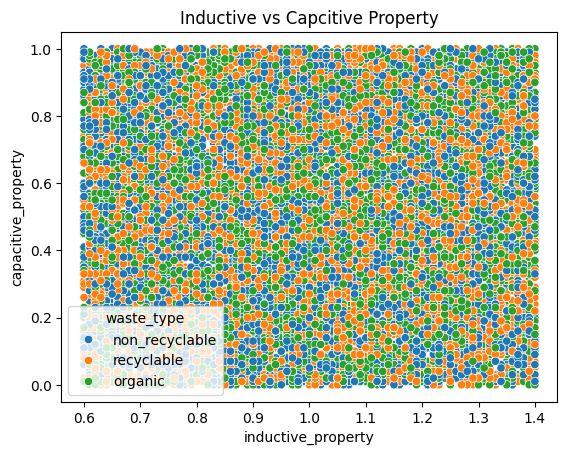

In [ ]:
sns.scatterplot(data=data, x='inductive_property', y='capacitive_property', hue='waste_type')
plt.title('Inductive vs Capcitive Property')
plt.show()

In [ ]:
import numpy as np
numeric_data = data.select_dtypes(include=np.number)
numeric_data['waste_type'] = data['waste_type']
grouped_data = numeric_data.groupby('waste_type').mean()
print(grouped_data)

                sensor_id  inductive_property  capacitive_property  \
waste_type                                                           
non_recyclable   2.494873            0.999571             0.503284   
organic          2.493762            1.005204             0.503162   
recyclable       2.499093            1.004448             0.499140   

                moisture_property  infrared_property  
waste_type                                            
non_recyclable           0.500065          49.945595  
organic                  0.502779          50.429857  
recyclable               0.502477          50.168693  


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

NameError: name 'plt' is not defined

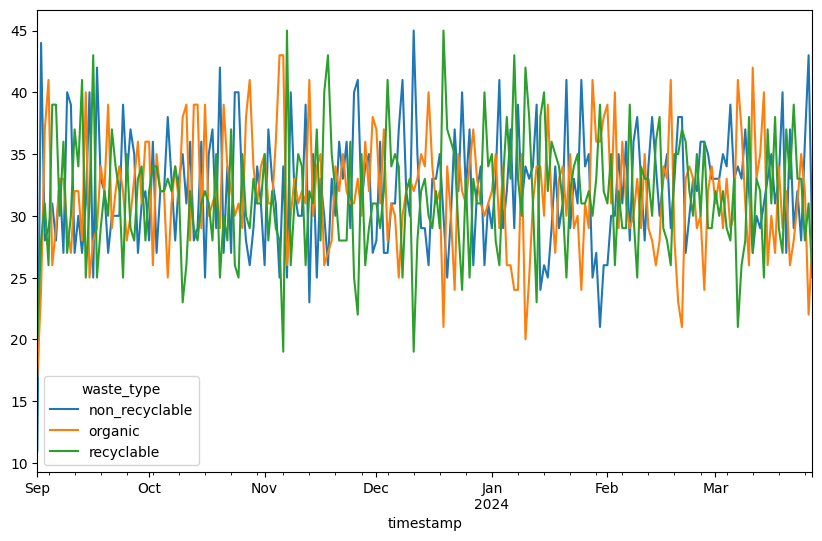

In [6]:
data.set_index('timestamp').groupby('waste_type')['sensor_id'].resample('D').count().unstack(0).plot(figsize=(10, 6))
plt.title('Waste Type Counts Over Time')
plt.ylabel('Count')
plt.show()

In [ ]:
data.nunique()

,0
sensor_id,4
timestamp,20000
waste_type,3
inductive_property,81
capacitive_property,101
moisture_property,101
infrared_property,8648


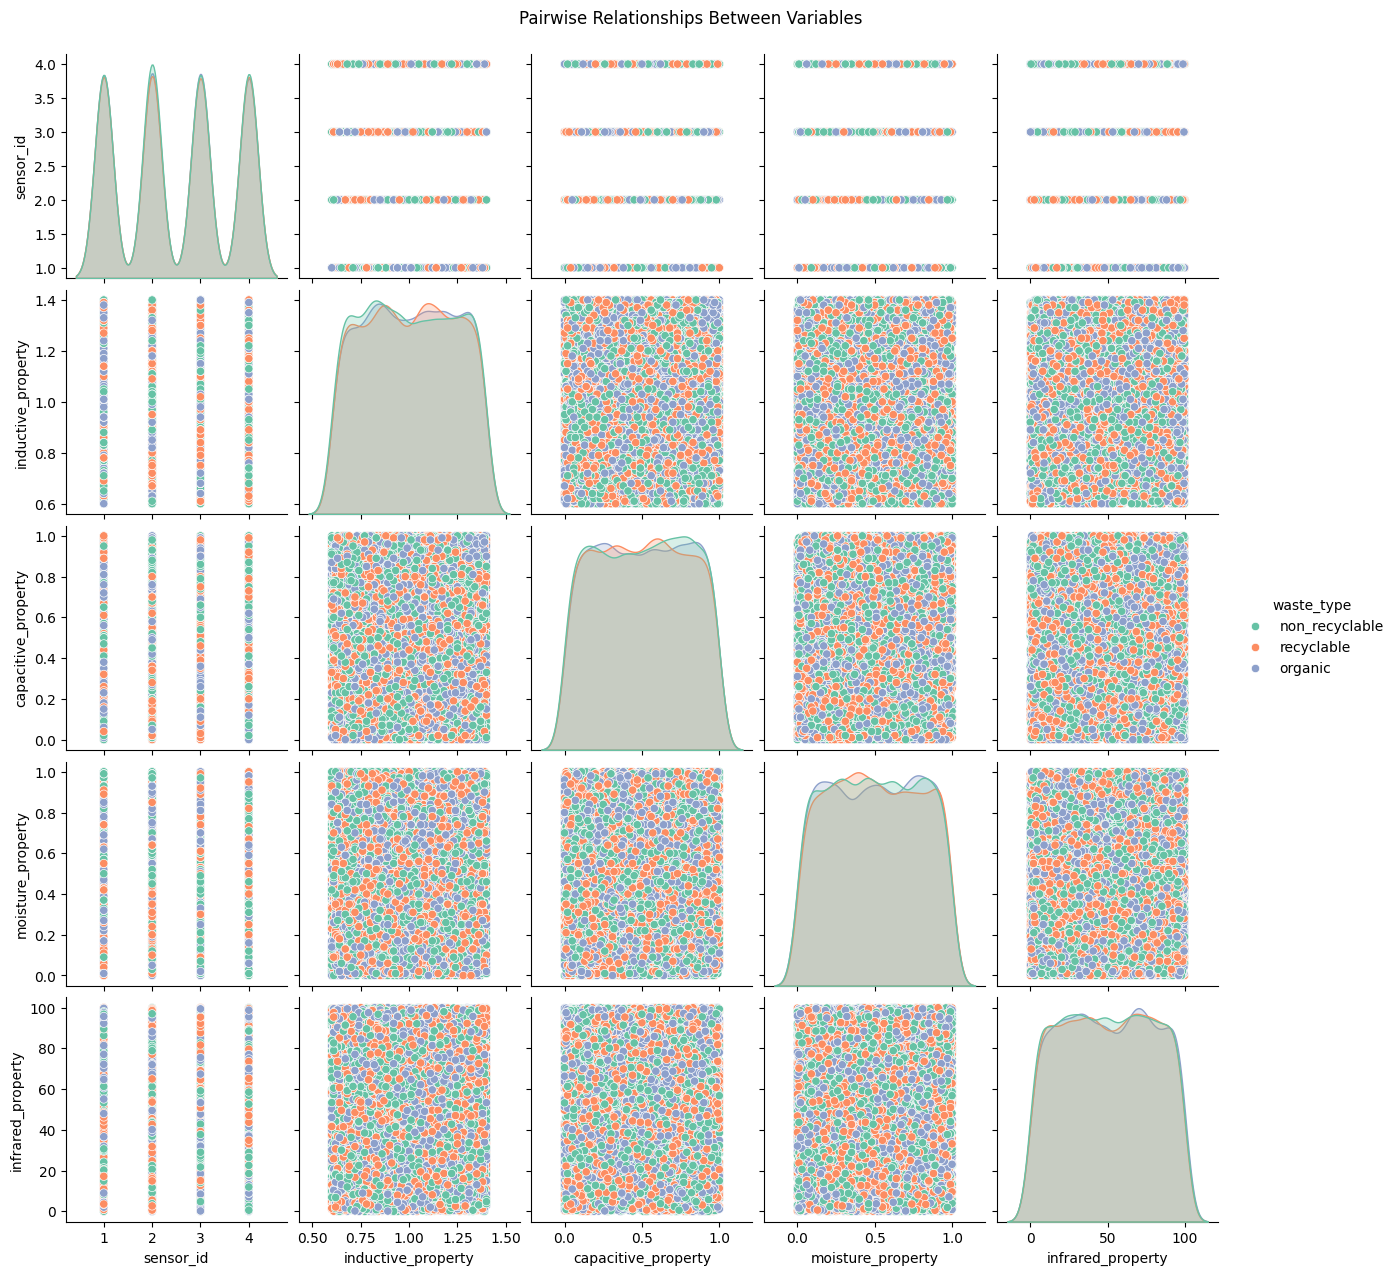

In [ ]:
sns.pairplot(data, hue='waste_type', diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Relationships Between Variables", y=1.02)
plt.show()

<ipython-input-179-b6a00fd840a6>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




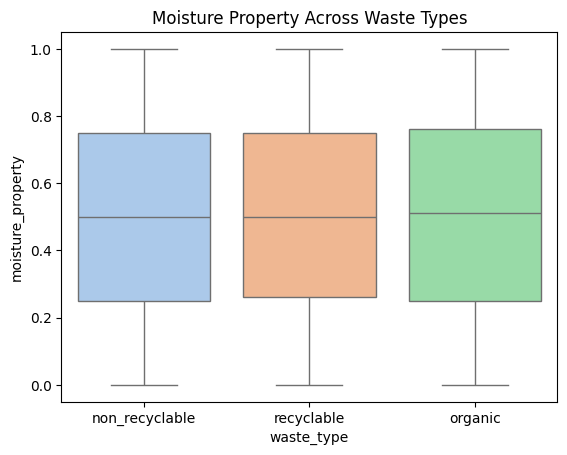

In [ ]:
sns.boxplot(data=data, x='waste_type', y='moisture_property', palette='pastel')
plt.title('Moisture Property Across Waste Types')
plt.show()

<ipython-input-180-2afec384e7ff>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




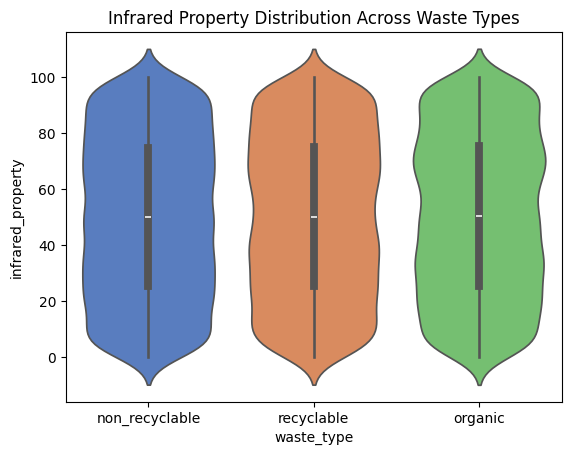

In [ ]:
sns.violinplot(data=data, x='waste_type', y='infrared_property', palette='muted')
plt.title('Infrared Property Distribution Across Waste Types')
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                     sensor_id  inductive_property  capacitive_property  \
sensor_id             1.000000           -0.004961             0.002373   
inductive_property   -0.004961            1.000000            -0.013723   
capacitive_property   0.002373           -0.013723             1.000000   
moisture_property     0.001820            0.013900            -0.004284   
infrared_property     0.006201            0.003220             0.000150   

                     moisture_property  infrared_property  
sensor_id                     0.001820           0.006201  
inductive_property            0.013900           0.003220  
capacitive_property          -0.004284           0.000150  
moisture_property             1.000000          -0.001861  
infrared_property            -0.001861           1.000000  


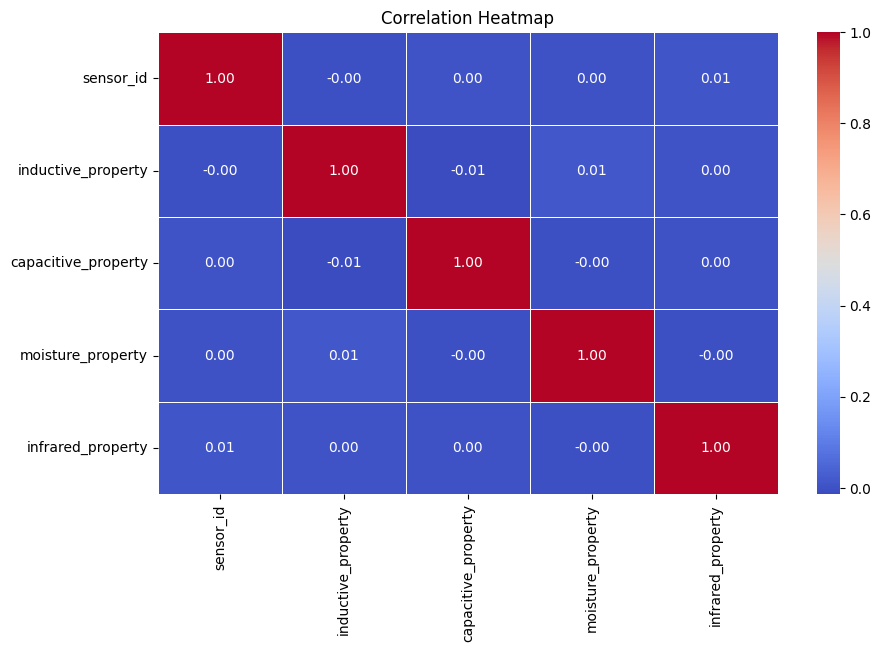

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

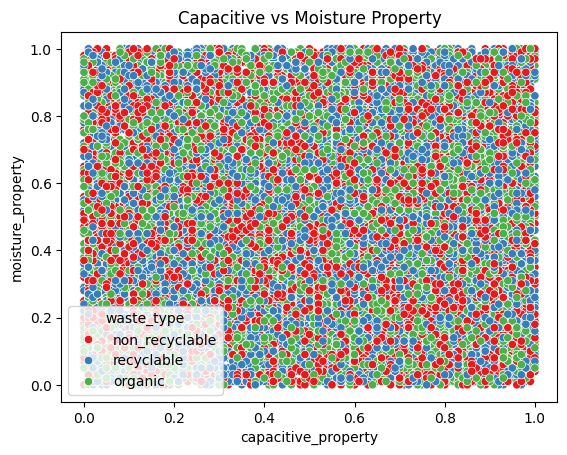

In [ ]:
sns.scatterplot(data=data, x='capacitive_property', y='moisture_property', hue='waste_type', palette='Set1')
plt.title('Capacitive vs Moisture Property')
plt.show()

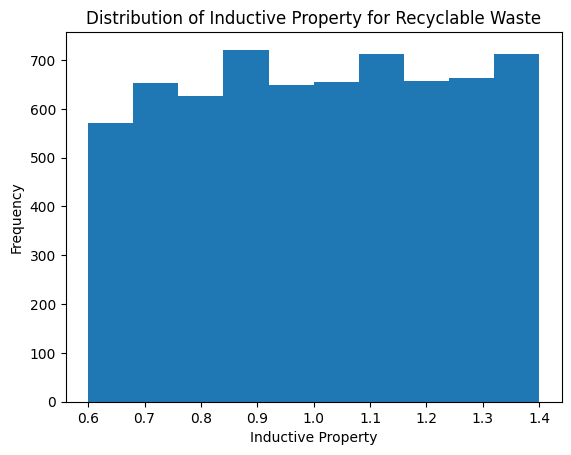

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of 'inductive_property' for 'recyclable' waste
recyclable_data = data[data['waste_type'] == 'recyclable']['inductive_property']
plt.hist(recyclable_data, bins=10)
plt.xlabel('Inductive Property')
plt.ylabel('Frequency')
plt.title('Distribution of Inductive Property for Recyclable Waste')
plt.show()

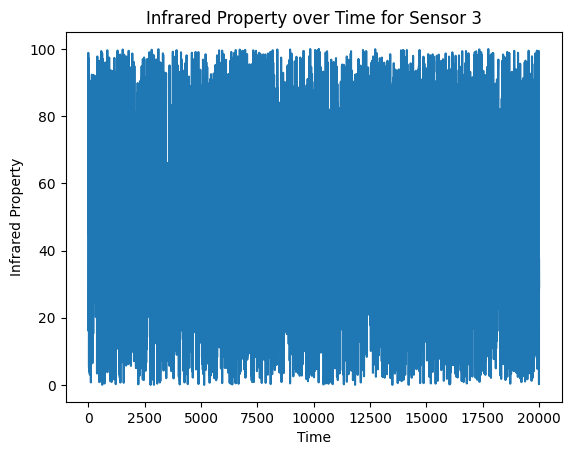

In [ ]:
# Example: Line plot of 'infrared_property' over time for a specific sensor
sensor_data = data[data['sensor_id'] == 3]['infrared_property']
plt.plot(sensor_data.index, sensor_data.values)
plt.xlabel('Time')
plt.ylabel('Infrared Property')
plt.title('Infrared Property over Time for Sensor 3')
plt.show()

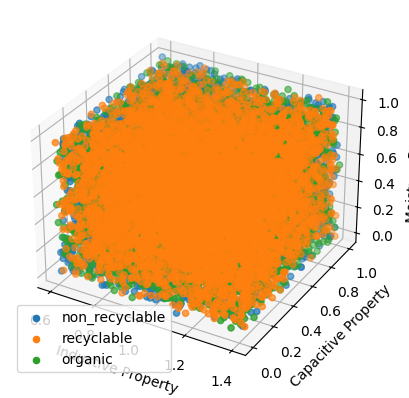

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for waste_type in data['waste_type'].unique():
    subset = data[data['waste_type'] == waste_type]
    ax.scatter(subset['inductive_property'], subset['capacitive_property'], subset['moisture_property'], label=waste_type)

ax.set_xlabel('Inductive Property')
ax.set_ylabel('Capacitive Property')
ax.set_zlabel('Moisture Property')
ax.legend()
plt.show()

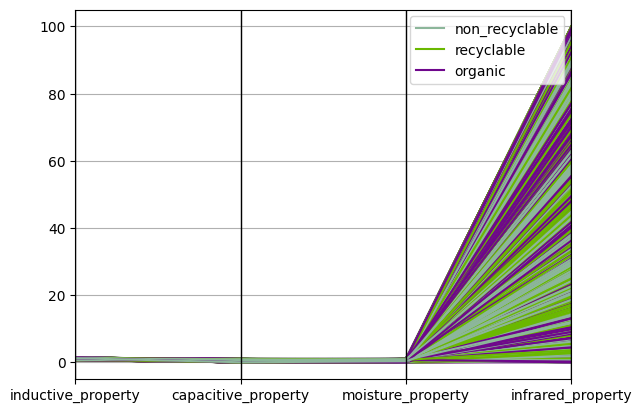

In [ ]:
import pandas as pd

pd.plotting.parallel_coordinates(data, 'waste_type', cols=['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property'])
plt.show()

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named 'data'
fig = px.scatter_3d(data,
                    x='inductive_property',
                    y='capacitive_property',
                    z='moisture_property',
                    color='waste_type',
                    title="Waste Sensor Data Visualization")
fig.show()

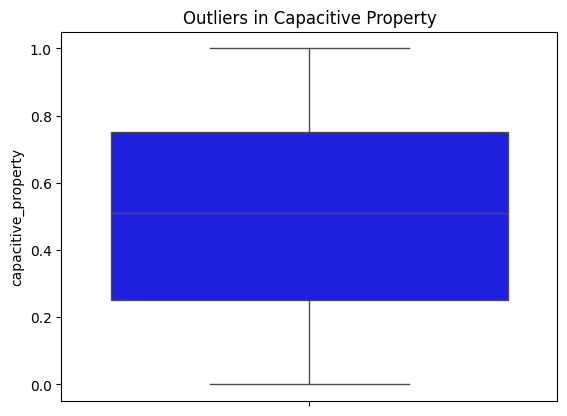

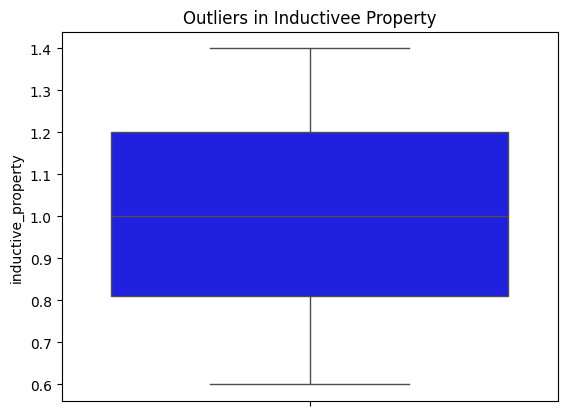

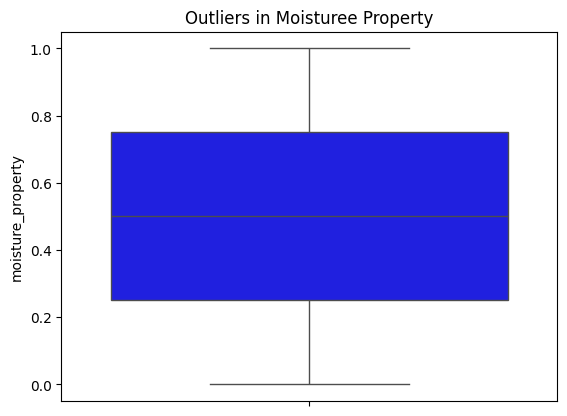

In [ ]:
sns.boxplot(data=data, y='capacitive_property', color='blue')
plt.title('Outliers in Capacitive Property')
plt.show()
sns.boxplot(data=data, y='inductive_property', color='blue')
plt.title('Outliers in Inductivee Property')
plt.show()
sns.boxplot(data=data, y='moisture_property', color='blue')
plt.title('Outliers in Moisturee Property')
plt.show()

<ipython-input-190-5b17c64bf2ff>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




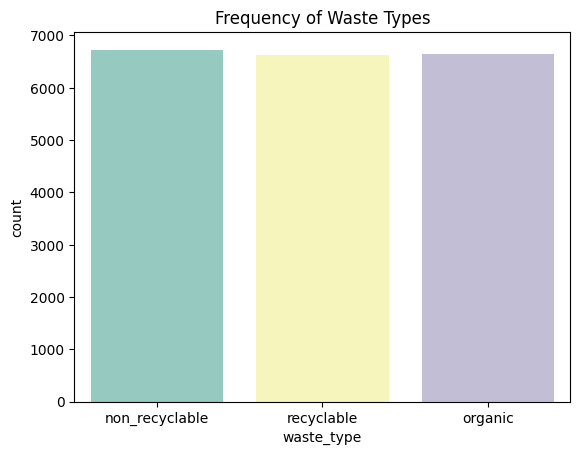

In [ ]:
sns.countplot(data=data, x='waste_type', palette='Set3')
plt.title('Frequency of Waste Types')
plt.show()

In [7]:
data['waste_type'].value_counts(normalize=True) * 100

,proportion
waste_type,
non_recyclable,33.645
organic,33.265
recyclable,33.090


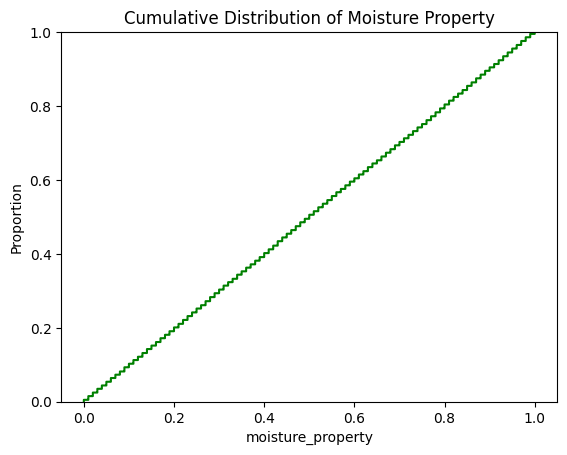

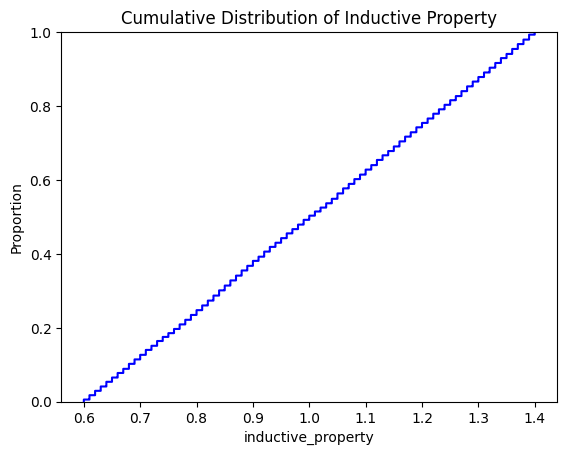

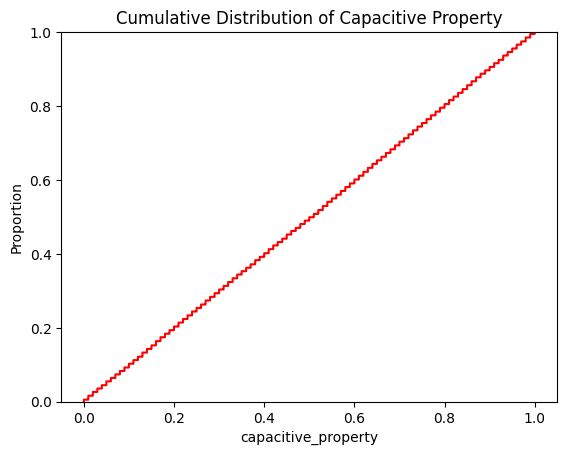

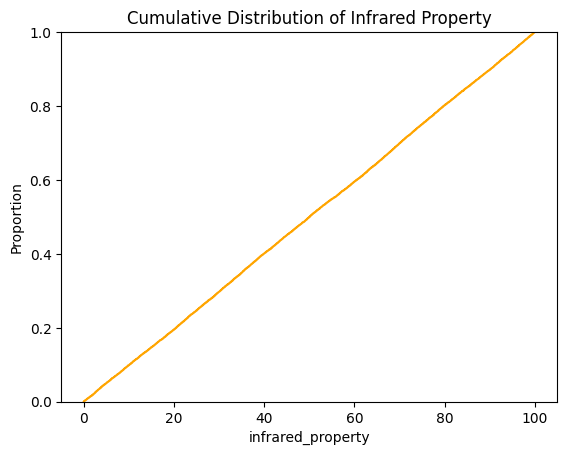

In [ ]:
sns.ecdfplot(data['moisture_property'], color='green')
plt.title('Cumulative Distribution of Moisture Property')
plt.show()
sns.ecdfplot(data['inductive_property'],color='blue')
plt.title('Cumulative Distribution of Inductive Property')
plt.show()
sns.ecdfplot(data['capacitive_property'],color='red')
plt.title('Cumulative Distribution of Capacitive Property')
plt.show()
sns.ecdfplot(data['infrared_property'],color='orange')
plt.title('Cumulative Distribution of Infrared Property')
plt.show()

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.select_dtypes(include='number')
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


               Feature       VIF
0            sensor_id  5.123555
1   inductive_property  8.827398
2  capacitive_property  3.649265
3    moisture_property  3.697371
4    infrared_property  3.680822


In [ ]:
data.groupby('waste_type').agg(
    max_moisture=('moisture_property', 'max'),
    avg_moisture=('moisture_property', 'mean'),
    total_entries=('moisture_property', 'count')
)


,max_moisture,avg_moisture,total_entries
waste_type,,,
non_recyclable,1.0,0.500065,6729
organic,1.0,0.502779,6653
recyclable,1.0,0.502477,6618


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [9]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'data'
data['waste_type_organic'] = np.where(data['waste_type'] == 'organic', 1, 0)
data['waste_type_recyclable'] = np.where(data['waste_type'] == 'recyclable', 1, 0)

# Display the updated DataFrame
data.head()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property,waste_type_organic,waste_type_recyclable
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27,0,0
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00,0,1
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89,0,0
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80,1,0
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83,0,1


In [11]:
# Assuming your DataFrame is named 'data'
data = data.drop('waste_type', axis=1)

# Display the updated DataFrame
data.head()

,sensor_id,timestamp,inductive_property,capacitive_property,moisture_property,infrared_property,waste_type_organic,waste_type_recyclable
0,3,2023-09-01 12:00:00,0.90,0.12,0.47,16.27,0,0
1,4,2023-09-01 12:15:00,1.18,0.66,0.33,36.00,0,1
2,3,2023-09-01 12:30:00,0.87,0.14,0.83,58.89,0,0
3,2,2023-09-01 12:45:00,1.00,0.37,0.52,91.80,1,0
4,3,2023-09-01 13:00:00,1.39,0.88,0.76,98.83,0,1


In [12]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data.drop(columns=['timestamp'], inplace=True)


In [13]:
data.fillna(data.mean(), inplace=True)


In [14]:
scaler = StandardScaler()
numerical_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property', 'hour', 'day_of_week']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [15]:
X = data.drop(columns=['waste_type_recyclable'])
y = data['waste_type_recyclable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [17]:
data.fillna(data.mean(), inplace=True)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
print(data.isnull().sum())


sensor_id                0
inductive_property       0
capacitive_property      0
moisture_property        0
infrared_property        0
waste_type_organic       0
waste_type_recyclable    0
hour                     0
day_of_week              0
dtype: int64


In [18]:
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
print(data[numerical_columns].describe())


       inductive_property  capacitive_property  moisture_property  \
count        2.000000e+04         2.000000e+04       2.000000e+04   
mean         6.586731e-16        -1.882938e-16       2.309264e-16   
std          1.000025e+00         1.000025e+00       1.000025e+00   
min         -1.749987e+00        -1.741607e+00      -1.741764e+00   
25%         -8.382153e-01        -8.740527e-01      -8.739473e-01   
50%         -1.327930e-02         2.820420e-02      -6.130260e-03   
75%          8.550743e-01         8.610567e-01       8.616868e-01   
max          1.723428e+00         1.728611e+00       1.729504e+00   

       infrared_property          hour   day_of_week  
count       2.000000e+04  2.000000e+04  2.000000e+04  
mean       -1.143974e-16  1.026734e-16 -7.105427e-18  
std         1.000025e+00  1.000025e+00  1.000025e+00  
min        -1.739864e+00 -1.662991e+00 -1.493832e+00  
25%        -8.615313e-01 -7.958259e-01 -9.956225e-01  
50%        -3.138729e-03  7.133875e-02  7.971357

In [19]:
print(data['waste_type_recyclable'].value_counts())
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print(pd.Series(y).value_counts())


waste_type_recyclable
0    13382
1     6618
Name: count, dtype: int64
waste_type_recyclable
0    13382
1    13382
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [20]:
data['inductive_capacitive'] = data['inductive_property'] * data['capacitive_property']
data['moisture_infrared'] = data['moisture_property'] * data['infrared_property']
print(data.head())


   sensor_id  inductive_property  capacitive_property  moisture_property  \
0          3           -0.447456            -1.325181          -0.110268   
1          4            0.768239             0.548737          -0.596246   
2          3           -0.577709            -1.255777           1.139388   
3          2           -0.013279            -0.457626           0.063295   
4          3            1.680010             1.312185           0.896400   

   infrared_property  waste_type_organic  waste_type_recyclable      hour  \
0          -1.175983                   0                      0  0.071339   
1          -0.491766                   0                      1  0.071339   
2           0.302037                   0                      0  0.071339   
3           1.443323                   1                      0  0.071339   
4           1.687117                   0                      1  0.215866   

   day_of_week  inductive_capacitive  moisture_infrared  
0     0.499007        

In [21]:
correlation_matrix = data.corr()
high_corr_features = [col for col in correlation_matrix.columns if any(abs(correlation_matrix[col]) > 0.9) and col != 'waste_type']
data.drop(columns=high_corr_features, inplace=True)
print(f"Dropped features: {high_corr_features}")


Dropped features: ['sensor_id', 'inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property', 'waste_type_organic', 'waste_type_recyclable', 'hour', 'day_of_week', 'inductive_capacitive', 'moisture_infrared']


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(f"Shape of feature matrix before: {X.shape}, after: {X_poly.shape}")


Shape of feature matrix before: (26764, 8), after: (26764, 44)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
print(f"Shape before PCA: {X.shape}, after PCA: {X_reduced.shape}")


Shape before PCA: (26764, 8), after PCA: (26764, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled).describe())


                  0             1             2             3             4  \
count  26764.000000  26764.000000  26764.000000  26764.000000  26764.000000   
mean       0.495890      0.504627      0.500569      0.502439      0.501137   
std        0.371547      0.285814      0.285522      0.285243      0.286180   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.262500      0.250000      0.260000      0.252525   
50%        0.333333      0.500036      0.500000      0.500000      0.500750   
75%        0.666667      0.750000      0.750000      0.750000      0.748675   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7  
count  26764.000000  26764.000000  26764.000000  
mean       0.248580      0.498000      0.499509  
std        0.432198      0.298881      0.331579  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.238937     

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (21411, 8), Testing size: (5353, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    random_state=42,
    min_samples_split= 5,
    min_samples_leaf= 1,
    class_weight='balanced'
)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 77.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      2677
           1       0.72      0.91      0.80      2676

    accuracy                           0.78      5353
   macro avg       0.80      0.78      0.77      5353
weighted avg       0.80      0.78      0.77      5353


Confusion Matrix:
[[1727  950]
 [ 252 2424]]


In [ ]:

importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
               Feature  Importance
5   waste_type_organic    0.359822
4    infrared_property    0.116998
3    moisture_property    0.109107
1   inductive_property    0.108928
2  capacitive_property    0.108300
6                 hour    0.097604
7          day_of_week    0.072228
0            sensor_id    0.027013


In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 75.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2677
           1       0.72      0.82      0.77      2676

    accuracy                           0.75      5353
   macro avg       0.76      0.75      0.75      5353
weighted avg       0.76      0.75      0.75      5353


Confusion Matrix:
[[1831  846]
 [ 476 2200]]


Logistic Regression: Accuracy = 0.7534093031944704
SVM: Accuracy = 0.7534093031944704
K-Nearest Neighbors: Accuracy = 0.7672333271062955
Decision Tree: Accuracy = 0.7410797683541939
Naive Bayes: Accuracy = 0.7534093031944704
Random Forest: Accuracy = 0.7662992714365776
XGBoost: Accuracy = 0.7530356809265832


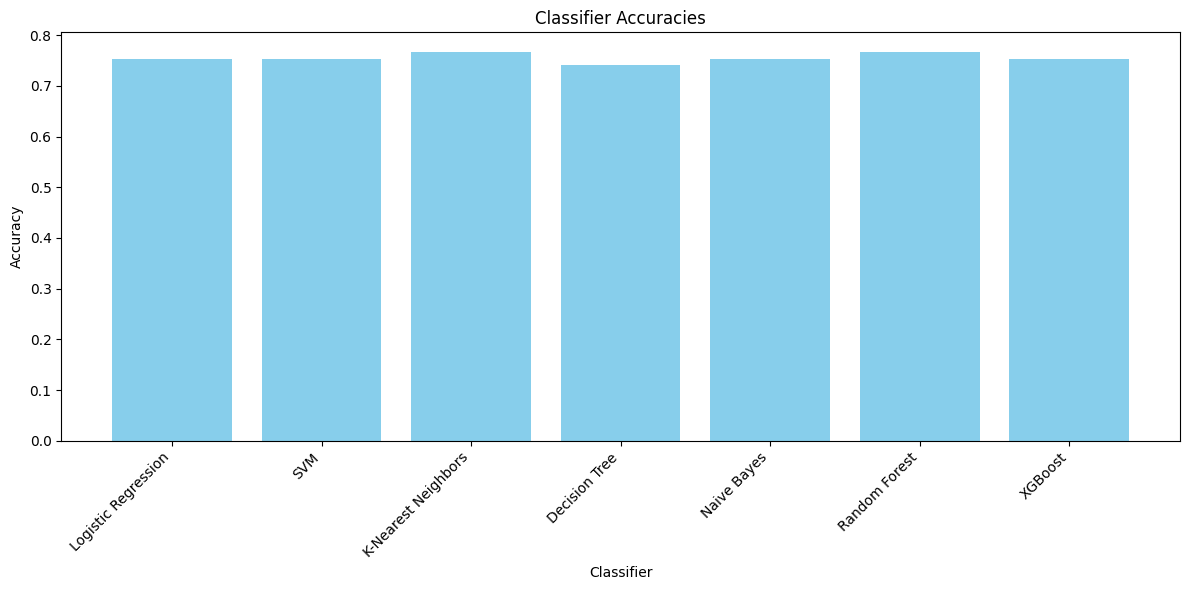

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}


accuracies = {}


for name, clf in classifiers.items():
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        print(f"{name}: Accuracy = {accuracy}")

    except Exception as e:
        print(f"Error training {name}: {e}")
        accuracies[name] = 0

plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()